# 📊 Comparative Visualization of Balanced Accuracy, FNR, and FPR Across Subpopulations

This visualization presents a comparative bar chart illustrating model performance across diverse subpopulations and dataset splits. The figure is crafted to highlight disparities and trends in **Balanced Accuracy**, **False Negative Rate (FNR)**, and **False Positive Rate (FPR)** using clear visual encodings and statistical overlays.

---

### 📐 Chart Structure & Interpretation

#### ✅ **Metric Display**
- The **y-axis** represents performance values in percentage (%).
- Metrics include:
  - **Balanced Accuracy**
  - **False Negative Rate (FNR)**
  - **False Positive Rate (FPR)**

#### 👥 **X-Axis Grouping**
- The **x-axis** is grouped into four key cohorts:
  - **All**: Overall model performance across all populations.
  - **NHW**: Non-Hispanic White
  - **NHA**: Non-Hispanic African American
  - **Hispanic**: Hispanic/Latino individuals

#### 🟩 **Bar Segmentation & Color Coding**
Each group displays three bars representing the performance of:
- **NHW** – shaded in **light blue** (`#c6dbef`)
- **NHA** – shaded in **light orange/tan** (`#f2d0a9`)
- **Hispanic** – shaded in **light green** (`#c5e8b7`)

This enables comparison **within** and **between** groups.

---

### 🔍 Data Partition Visualization

#### 📂 **Training vs. Test Split**
- **Solid border**: Performance on **Training** data
- **Dashed border**: Performance on **Test** data

This border styling encodes data partition while maintaining consistent color usage.

#### 📏 **Error Bars**
- Error bars denote the **Standard Error of the Mean (SEM)**, indicating confidence in performance estimates.

---

### 📌 Statistical Significance Overlay

- **P-value annotations** are displayed above group comparisons:
  - `p < 0.05` indicates a **statistically significant** difference.
  - `NS` (Not Significant) denotes no statistically meaningful difference.
- Visual annotation lines are used to connect comparisons directly.

---

### 🧮 Aggregate Insights (Optional Overlay)

A shaded grey rectangle highlights summary statistics:
- **Avg**: Mean performance across subgroups within a category.
- **AvD**: Average absolute difference between subgroup performances (disparity measure).

These annotations offer quick interpretability of central trends and fairness variability.

---


In [ ]:
import sys
sys.path.append("/home/Codes/ad_classification")

import os
import numpy as np
import pandas as pd
import viz_utils as vu

In [ ]:
# Configuration
source_dir = '/home/Codes/ad_classification'
groups   = [1, 2, 3, 4]
legends  = ['NHW', 'NHA', 'HISP']
datasets = ['Training', 'Training', 'Training',
            'Training', 'Test', 'Test',
            'Test', 'Training', 'Test',
            'Test', 'Test', 'Training']

metric_ = ['ba','fnr','fpr']
metric_title = ['Balanced Accuracy', 'FNR', 'FPR']
method_name  = 'xgb'

In [ ]:
configs = [
    [93, 4.7, 16, 93+int(16*2/3), 93+int(16/4.5), 'grey', 10, 110],
    [82, 4.7, 15, 82+int(15*1.8/3), 82+int(15/5.5), 'grey', 10, 95],
    [40, 4.7, 9, 40+int(10*2/3), 40+int(10/3.5), 'grey', 0, 50],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_none_0204PM_Mar242025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_0226PM_Mar242025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_0307PM_Mar242025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_0331PM_Mar242025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value=None, metric=metric_title[i], title='XGB',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_04142025.png",
                plot_avg=True, font_weight='semibold')

In [ ]:
configs = [
    [93, 4.7, 16, 93+int(16*2/3), 93+int(16/4.5), 'grey', 10, 110],
    [82, 4.7, 15, 82+int(15*1.8/3), 82+int(15/5.5), 'grey', 10, 95],
    [40, 4.7, 9, 40+int(10*2/3), 40+int(10/3.5), 'grey', 0, 50],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_kmm_0355PM_Mar242025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_kmm_0406PM_Mar242025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_kmm_0435PM_Mar242025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_kmm_0454PM_Mar242025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value=None, metric=metric_title[i], title='XGB + KMM',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_kmm_04142025.png",
                plot_avg=True, font_weight='semibold')

In [ ]:
configs = [
    [93, 4.7, 16, 93+int(16*2/3), 93+int(16/4.5), 'grey', 10, 110],
    [82, 4.7, 15, 82+int(15*1.8/3), 82+int(15/5.5), 'grey', 10, 95],
    [40, 4.7, 9, 40+int(10*2/3), 40+int(10/3.5), 'grey', 0, 50],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.05_none_cr_1025PM_Mar242025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.05_none_cr_1046PM_Mar242025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.05_none_cr_1125PM_Mar242025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.05_none_cr_1148PM_Mar242025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value=None, metric=metric_title[i], title='XGB + CR',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_cr_04142025.png",
                plot_avg=True, font_weight='semibold')

In [ ]:
configs = [
    [105, 4, 9, 105+int(9*2/3), 105+int(9/3), 115],
    [65, 4, 9, 65+int(9*2/3), 65+int(9/3), 80],
    [55, 4, 9, 55+int(9*2/3), 55+int(9/3), 70],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.05_kmm_cr_0830AM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.05_kmm_cr_0841AM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.05_kmm_cr_0911AM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.05_kmm_cr_0929AM_Mar252025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value, metric=metric_title[i], title='XGB + KMM + CR',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_kmm_cr_04142025.png",
                plot_avg=True, font_weight='semibold')

In [ ]:
configs = [
    [93, 4.7, 16, 93+int(16*2/3), 93+int(16/4.5), 'grey', 10, 110],
    [82, 4.7, 15, 82+int(15*1.8/3), 82+int(15/5.5), 'grey', 10, 95],
    [40, 4.7, 9, 40+int(10*2/3), 40+int(10/3.5), 'grey', 0, 50],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_none_harm_1239AM_Mar262025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_harm_0100AM_Mar262025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_harm_0139AM_Mar262025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_harm_0201AM_Mar262025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value=None, metric=metric_title[i], title='XGB + Harm',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_harm_04142025.png",
                plot_avg=True, font_weight='semibold')

In [ ]:
configs = [
    [105, 4, 9, 105+int(9*2/3), 105+int(9/3), 115],
    [65, 4, 9, 65+int(9*2/3), 65+int(9/3), 80],
    [55, 4, 9, 55+int(9*2/3), 55+int(9/3), 70],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_kmm_harm_0401PM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_kmm_harm_0411PM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_kmm_harm_0442PM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_kmm_harm_0500PM_Mar252025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value, metric=metric_title[i], title='XGB + KMM + Harm',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_kmm_harm_04142025.png",
                plot_avg=True, font_weight='semibold')

In [ ]:
configs = [
    [105, 4, 9, 105+int(9*2/3), 105+int(9/3), 115],
    [65, 4, 9, 65+int(9*2/3), 65+int(9/3), 80],
    [55, 4, 9, 55+int(9*2/3), 55+int(9/3), 70],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.05_none_harm_cr_0918PM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.05_none_harm_cr_0939PM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.05_none_harm_cr_1018PM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.05_none_harm_cr_1041PM_Mar252025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value, metric=metric_title[i], title='XGB + CR + Harm',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_cr_harm_04142025.png",
                plot_avg=True, font_weight='semibold')

In [ ]:
configs = [
    [105, 4, 9, 105+int(9*2/3), 105+int(9/3), 115],
    [65, 4, 9, 65+int(9*2/3), 65+int(9/3), 80],
    [55, 4, 9, 55+int(9*2/3), 55+int(9/3), 70],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.05_kmm_harm_cr_1112AM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.05_kmm_harm_cr_1122AM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.05_kmm_harm_cr_1152AM_Mar252025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.05_kmm_harm_cr_1211PM_Mar252025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value, metric=metric_title[i], title='XGB + KMM + CR + Harm',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_kmm_cr_harm_04142025.png",
                plot_avg=True, font_weight='semibold')

#### PLot for SVM

In [ ]:
# Configuration
source_dir = '/home/Codes/ad_classification'
groups   = [1, 2, 3, 4]
legends  = ['NHW', 'NHA', 'HISP']
datasets = ['Training', 'Training', 'Training',
            'Training', 'Test', 'Test',
            'Test', 'Training', 'Test',
            'Test', 'Test', 'Training']

metric_ = ['ba','fnr','fpr']
metric_title = ['Balanced Accuracy', 'FNR', 'FPR']
method_name  = 'svm'

In [ ]:
configs = [
    [93, 4.7, 16, 93+int(16*2/3), 93+int(16/4.5), 'grey', 10, 110],
    [82, 4.7, 15, 82+int(15*1.8/3), 82+int(15/5.5), 'grey', 10, 95],
    [40, 4.7, 9, 40+int(10*2/3), 40+int(10/3.5), 'grey', 0, 50],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_none_0826PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_0836PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_0852PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_0852PM_Apr282025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value=None, metric=metric_title[i], title='SVM',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_05072025.png",
                plot_avg=True, font_weight='semibold')

In [ ]:
configs = [
    [93, 4.7, 16, 93+int(16*2/3), 93+int(16/4.5), 'grey', 10, 110],
    [82, 4.7, 15, 82+int(15*1.8/3), 82+int(15/5.5), 'grey', 10, 95],
    [40, 4.7, 9, 40+int(10*2/3), 40+int(10/3.5), 'grey', 0, 50],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_none_harm_1001PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_harm_1012PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_harm_1030PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_harm_1030PM_Apr282025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value=None, metric=metric_title[i], title='SVM + Harm',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_harm_05072025.png",
                plot_avg=True, font_weight='semibold')

In [ ]:
configs = [
    [93, 4.7, 16, 93+int(16*2/3), 93+int(16/4.5), 'grey', 10, 110],
    [82, 4.7, 15, 82+int(15*1.8/3), 82+int(15/5.5), 'grey', 10, 95],
    [40, 4.7, 9, 40+int(10*2/3), 40+int(10/3.5), 'grey', 0, 50],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.05_none_cr_0927PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.05_none_cr_0937PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.05_none_cr_0953PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.05_none_cr_0953PM_Apr282025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value=None, metric=metric_title[i], title='SVM + CR',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_cr_05072025.png",
                plot_avg=True, font_weight='semibold')

In [ ]:
configs = [
    [93, 4.7, 16, 93+int(16*2/3), 93+int(16/4.5), 'grey', 10, 110],
    [82, 4.7, 15, 82+int(15*1.8/3), 82+int(15/5.5), 'grey', 10, 95],
    [40, 4.7, 9, 40+int(10*2/3), 40+int(10/3.5), 'grey', 0, 50],
]

list_paths = [
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_kmm_0901PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_kmm_0909PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_kmm_0911PM_Apr282025.pkl',
    f'{source_dir}/results/{method_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_kmm_0912PM_Apr282025.pkl'
]

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result(list_paths, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value=None, metric=metric_title[i], title='SVM + KMM',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_kmm_05072025.png",
                plot_avg=True, font_weight='semibold')

### New data loading
Load results from saved CSV for each scenario per fold in format: `scenario_<scenario_name>_fold_<fold_number>_predict.csv`

In [ ]:
# Configuration
source_dir = '/home/Codes/ad_classification'
groups   = [1, 2, 3, 4]
legends  = ['NHW', 'NHA', 'HISP']
datasets = ['Training', 'Training', 'Training',
            'Training', 'Test', 'Test',
            'Test', 'Training', 'Test',
            'Test', 'Test', 'Training']

metric_ = ['ba','fnr','fpr']
metric_title = ['Balanced Accuracy', 'FNR', 'FPR']
method_name  = 'xgb'
scenarios = ['all', 'nhw', 'nha', 'hisp']

In [ ]:
out_dir = rf'{source_dir}/results/{method_name}_objective_v2_1B/'

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")
    
configs = [
    [93, 4.7, 16, 93+int(16*2/3), 93+int(16/4.5), 'grey', 10, 110],
    [82, 4.7, 15, 82+int(15*1.8/3), 82+int(15/5.5), 'grey', 10, 95],
    [40, 4.7, 9, 40+int(10*2/3), 40+int(10/3.5), 'grey', 0, 50],
]

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result_from_csv(out_dir, scenarios, 10, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value=None, metric=metric_title[i], title='XGB + RegAlign',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_regalign_04162025.png",
                plot_avg=True, font_weight='semibold')


In [ ]:
out_dir = rf'{source_dir}/results/{method_name}_objective_v2_2B/'

if not os.path.exists(f"{source_dir}/images/{method_name}_new"):
    os.makedirs(f"{source_dir}/images/{method_name}_new")
    
configs = [
    [93, 4.7, 16, 93+int(16*2/3), 93+int(16/4.5), 'grey', 10, 110],
    [102, 4.7, 18, 102+int(18*2/3), 102+int(18/4.5), 'grey', 10, 120],
    [40, 4.7, 9, 40+int(10*2/3), 40+int(10/3.5), 'grey', 0, 50],
]

for i in range(len(metric_)):
    # Generate performance results
    performance, error, p_value = vu.generate_result_from_csv(out_dir, scenarios, 10, metric=metric_[i])

    # Plot the results
    vu.plot_bar_chart(performance, error, groups, datasets, legends, configs[i],
                p_value=None, metric=metric_title[i], title='XGB + SSDA',
                save_path=f"{source_dir}/images/{method_name}_new/{metric_[i]}_{method_name}_ssda_04162025.png",
                plot_avg=True, font_weight='semibold')


# 🔀 Pareto Front Visualization: Fairness vs. Performance Trade-off

This visualization captures the **trade-off between model performance and fairness**, offering insights into how different methods or subgroups balance these critical objectives.

---

### 🧭 Axis Definitions

- **🟦 X-Axis – Fairness Metric**  
  Represents a fairness discrepancy score (e.g., **FPR Discrepancy**, **Equalized Odds**, etc.).  
  - 🔻 **Lower values** indicate better fairness (closer to equity across groups).

- **🟩 Y-Axis – Performance Metric**  
  Denotes the **overall balanced accuracy** of the model.  
  - 🔺 **Higher values** indicate better predictive performance.

---

### 📌 Key Plot Elements

#### 🔹 **Data Points and Grouping**
- Each point reflects the **average fairness vs. performance** across folds.
- Grouping is determined by:
  - `centroid_type = 'method'` → Grouped by algorithm/method (e.g., Base, CR, KMM, Harmonized).
  - `centroid_type = 'group'` → Grouped by data subpopulation (e.g., All, NHW, NHA, Hispanic).
- Different **marker shapes and colors** distinguish between the groupings.

#### 🔸 **Confidence Ellipses**
- Ellipses encapsulate the variability of each group’s performance across folds.
- Computed using a fixed **number of standard deviations (n_std)**.
- Help visualize **stability** of each method or subgroup.

---

### ⭐ Centroid & Ideal Point

- **Centroid**: The average (mean) position of each group or method’s data points.
- **Ideal Point**:  
  Defined as the theoretical **best** combination:
  - **Lowest fairness discrepancy** (far left),
  - **Highest performance** (top).
- A **dashed line** connects the **closest centroid** to the ideal point, indicating the most balanced trade-off.

---

### ⚙️ Pareto Front

- The **Pareto front** is shown in **thick gray**.
- It highlights models that are **Pareto-optimal**—no other model outperforms them in **both** fairness and performance.
- Useful for identifying models with optimal trade-offs without sacrificing too much in either direction.

---

### 🔽 Directional Guidance

- **⬆ Upward Arrow**: Indicates that higher performance is better.
- **⬅ Leftward Arrow**: Indicates that lower fairness discrepancy (i.e., improved fairness) is desirable.

---

This visualization offers a powerful lens for evaluating and selecting models that **balance fairness and performance**.


In [1]:
import sys
sys.path.append("/home/Codes/ad_classification")

import numpy as np
import pandas as pd
import viz_utils as vu

In [ ]:
model_name = 'svm'
if model_name=='xgb':
    list_paths = [
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_none_0204PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_0226PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_0307PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_0331PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_kmm_0355PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_kmm_0406PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_kmm_0435PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_kmm_0454PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.05_none_cr_1025PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.05_none_cr_1046PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.05_none_cr_1125PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.05_none_cr_1148PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_none_harm_1239AM_Mar262025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_harm_0100AM_Mar262025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_harm_0139AM_Mar262025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_harm_0201AM_Mar262025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.05_kmm_cr_0830AM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.05_kmm_cr_0841AM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.05_kmm_cr_0911AM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.05_kmm_cr_0929AM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_kmm_harm_0401PM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_kmm_harm_0411PM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_kmm_harm_0442PM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_kmm_harm_0500PM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.05_none_harm_cr_0918PM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.05_none_harm_cr_0939PM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.05_none_harm_cr_1018PM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.05_none_harm_cr_1041PM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.05_kmm_harm_cr_1112AM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.05_kmm_harm_cr_1122AM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.05_kmm_harm_cr_1152AM_Mar252025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.05_kmm_harm_cr_1211PM_Mar252025.pkl',
    ]
elif model_name=='svm':
    list_paths = [
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-All_rate_0_none_1058PM_Jan062025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHW_rate_0_none_0118AM_Jan072025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHA_rate_0_none_0356AM_Jan072025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-Hispanic_rate_0_none_0356AM_Jan072025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-All_rate_0_none_0902PM_Jan072025_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHW_rate_0_none_1125PM_Jan072025_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHA_rate_0_none_0207AM_Jan082025_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-Hispanic_rate_0_none_0208AM_Jan082025_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-All_rate_0_kmm_0448PM_Jan072025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHW_rate_0_kmm_0558PM_Jan072025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHA_rate_0_kmm_0605PM_Jan072025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-Hispanic_rate_0_kmm_0605PM_Jan072025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-All_rate_0_none_0729PM_Jan102025_harmonized.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHW_rate_0_none_1039PM_Jan102025_harmonized.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHA_rate_0_none_0217AM_Jan112025_harmonized.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-Hispanic_rate_0_none_0217AM_Jan112025_harmonized.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-All_rate_0_kmm_1112PM_Jan082025_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHW_rate_0_kmm_1204AM_Jan092025_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHA_rate_0_kmm_1214AM_Jan092025_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-Hispanic_rate_0_kmm_1214AM_Jan092025_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-All_rate_0_kmm_0155AM_Jan132025_harmonized.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHW_rate_0_kmm_0246AM_Jan132025_harmonized.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHA_rate_0_kmm_0256AM_Jan132025_harmonized.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-Hispanic_rate_0_kmm_0256AM_Jan132025_harmonized.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-All_rate_0_none_0814PM_Jan092025_harmonized_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHW_rate_0_none_1117PM_Jan092025_harmonized_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHA_rate_0_none_0257AM_Jan102025_harmonized_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-Hispanic_rate_0_none_0258AM_Jan102025_harmonized_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-All_rate_0_kmm_0523PM_Jan092025_harmonized_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHW_rate_0_kmm_0631PM_Jan092025_harmonized_cr.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}/NCvsDem_train-NHA_rate_0_kmm_0641PM_Jan092025_harmonized_cr.pkl',
        fr'/hehome/Codesnryho/ad_classification/results/{model_name}/NCvsDem_train-Hispanic_rate_0_kmm_0641PM_Jan092025_harmonized_cr.pkl',
    ]

results_ba   = vu.compute_performance(list_paths, metric='ba')
results_fair = vu.compute_performance(list_paths, metric='fpr')

results_avg_ba   = results_ba.groupby(['Model', 'Scenario'], as_index=False)[["NHW", "NHA", "Hisp"]].mean()
results_avg_fair = results_fair.groupby(['Model', 'Scenario'], as_index=False)[["NHW", "NHA", "Hisp"]].mean()
results_avg_ba['Pred_ba_avg']   = results_avg_ba[['NHW', 'NHA', 'Hisp']].mean(axis=1)
results_avg_fair['Pred_fair_avg'] = (abs(results_avg_fair['NHW'] - results_avg_fair['NHA']) + abs(results_avg_fair['NHW'] - results_avg_fair['Hisp']) + abs(results_avg_fair['NHA'] - results_avg_fair['Hisp'])) / 3
methods = results_avg_ba['Model'].values
groups  = results_avg_ba['Scenario'].values
performance = np.array([results_avg_ba['Pred_ba_avg'].values, results_avg_fair['Pred_fair_avg'].values]) * 100

centroid_type = 'method'
fair_metric = 'FPR Discripancy'
if fair_metric == 'SEDF':
    fig_config = [5, 60, 58, 6, 1.3, 0.6, 59, 58, -12, 0.6, 1.4, 48.5]
elif fair_metric == 'EOD':
    fig_config = [3, 25, 23, 6, 0.5, 0.6, 23.3, 23, -5.5, 0.6, 0.6, 18]
elif fair_metric == 'GEOD':
    fig_config = [2, 20, 18, 6, 0.5, 0.6, 18.3, 18, -5, 0.6, 0.4, 14]
elif fair_metric == 'FNR Discripancy':
    fig_config = [-1, 25, 22, 6, 0.5, 0.6, 22.5, 22, -7, 0.6, 0.4, 15.5]
elif fair_metric == 'FPR Discripancy':
    fig_config = [-2, 27, 22, 6, 0.4, 0.4, 22.5, 22, -6, 0.5, 0.5, 15.5]

vu.plot_fit_central_pareto_front(performance, methods, groups, fig_config, centroid_type, metric_titles=["Balanced Accuracy", "FPR Discrepancy"])

Centroid Colors:
Base: RGBA (0.122, 0.467, 0.706, 1.0)
CR: RGBA (0.173, 0.627, 0.173, 1.0)
Harm: RGBA (0.58, 0.404, 0.741, 1.0)
KMM: RGBA (0.89, 0.467, 0.761, 1.0)
RegAlign: RGBA (0.737, 0.741, 0.133, 1.0)
SSDA: RGBA (0.09, 0.745, 0.812, 1.0)


/home/Codes/ad_classification/viz_utils.py:513: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, marker=cfg["marker"], facecolors=fc, edgecolors=ec,
/home/Codes/ad_classification/viz_utils.py:513: UserWarning: You passed a edgecolor/edgecolors ((0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, marker=cfg["marker"], facecolors=fc, edgecolors=ec,
/home/Codes/ad_classification/viz_utils.py:513: UserWarning: You passed a edgecolor/edgecolors ((0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor. 

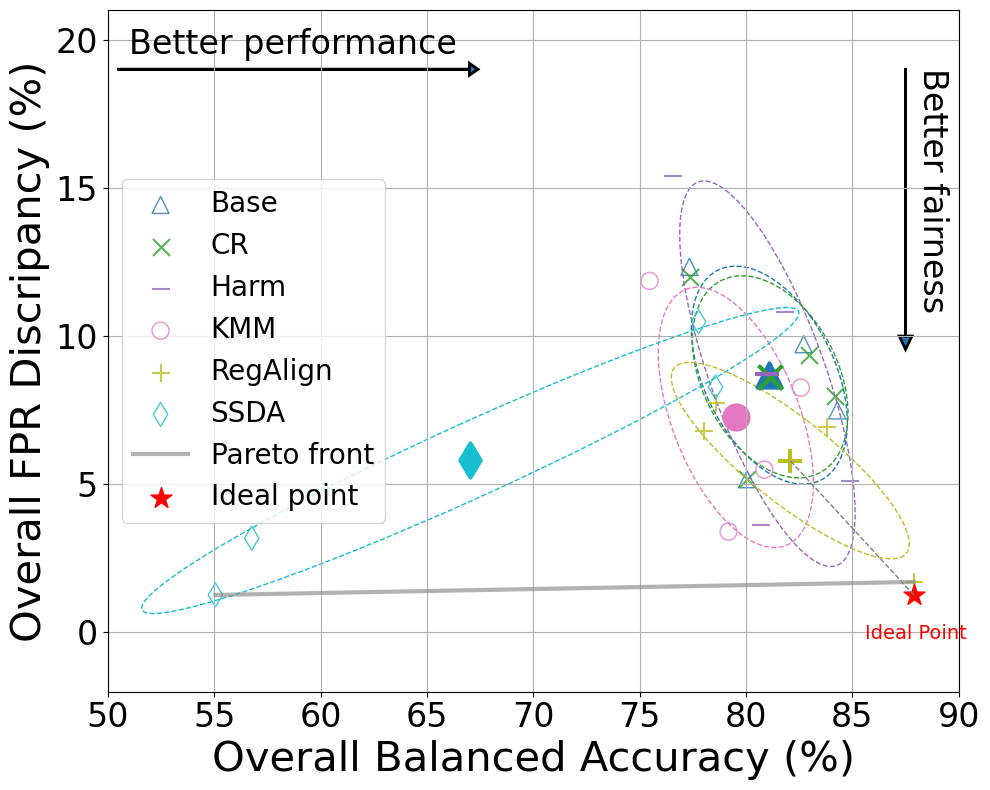

In [ ]:
model_name = 'xgb'
if model_name=='xgb':
    list_paths = [
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_none_0204PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_0226PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_0307PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_0331PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_kmm_0355PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_kmm_0406PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_kmm_0435PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_kmm_0454PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.05_none_cr_1025PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.05_none_cr_1046PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.05_none_cr_1125PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.05_none_cr_1148PM_Mar242025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_none_harm_1239AM_Mar262025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_harm_0100AM_Mar262025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_harm_0139AM_Mar262025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_harm_0201AM_Mar262025.pkl',
    ]
    results_ba   = vu.compute_performance(list_paths, metric='ba')
    results_fair = vu.compute_performance(list_paths, metric='fnr')

    list_dirs = [
        fr'/home/Codes/ad_classification/results/{model_name}_objective_v2_2B',
        fr'/home/Codes/ad_classification/results/{model_name}_objective_v2_1B',
    ]

    results_ba_new   = vu.compute_performance_new(list_dirs, metric='ba')
    results_fair_new   = vu.compute_performance_new(list_dirs, metric='fnr')

    combined_ba = pd.concat([results_ba, results_ba_new], ignore_index=True)
    combined_fair = pd.concat([results_fair, results_fair_new], ignore_index=True)
elif model_name=='svm':
    list_paths = [
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_none_0826PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_0836PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_0852PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_0852PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_kmm_0901PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_kmm_0909PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_kmm_0911PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_kmm_0912PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.05_none_cr_0927PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.05_none_cr_0953PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.05_none_cr_0937PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.05_none_cr_0953PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-All_rate_0_alpha_0.0_none_harm_1001PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_harm_1012PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_harm_1030PM_Apr282025.pkl',
        fr'/home/Codes/ad_classification/results/{model_name}_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_harm_1030PM_Apr282025.pkl',
    ]
    combined_ba   = vu.compute_performance(list_paths, metric='ba')
    combined_fair = vu.compute_performance(list_paths, metric='fpr')

results_avg_ba   = combined_ba.groupby(['Model', 'Scenario'], as_index=False)[["NHW", "NHA", "HISP"]].mean()
results_avg_fair = combined_fair.groupby(['Model', 'Scenario'], as_index=False)[["NHW", "NHA", "HISP"]].mean()
results_avg_ba['Pred_ba_avg']   = results_avg_ba[['NHW', 'NHA', 'HISP']].mean(axis=1)
results_avg_fair['Pred_fair_avg'] = (abs(results_avg_fair['NHW'] - results_avg_fair['NHA']) + abs(results_avg_fair['NHW'] - results_avg_fair['HISP']) + abs(results_avg_fair['NHA'] - results_avg_fair['HISP'])) / 3
methods = results_avg_ba['Model'].values
groups  = results_avg_ba['Scenario'].values
performance = np.array([results_avg_ba['Pred_ba_avg'].values, results_avg_fair['Pred_fair_avg'].values]) * 100

centroid_type = 'group'
fair_metric = 'FPR Discripancy'
if fair_metric == 'FNR Discripancy':
    fig_config = [-2, 21, 19, 16.5, 0.4, 0.4, 19.5, 19, -10, 0.6, 0.45, 10.5]
elif fair_metric == 'FPR Discripancy':
    fig_config = [-2, 21, 19, 16.5, 0.4, 0.4, 19.5, 19, -10, 0.6, 0.45, 10.5]

vu.plot_fit_central_pareto_front(performance, methods, groups, fig_config, centroid_type, metric_titles=["Balanced Accuracy", fair_metric])

# 📊 SHAP Reliability and Precision Visualization for Brain Regions

This notebook visualizes SHAP value reliability and precision across key brain regions in a dementia classification task. The analysis leverages a **streaming approach** to process large-scale bootstrapped SHAP outputs efficiently and identify **bilateral (left-right) brain regions** with the most consistent and informative SHAP profiles.

### 🧠 Objective
To identify pairs of brain regions with the most **reliable and precise SHAP contributions** using bootstrapped model interpretations, and visualize how SHAP values change with the associated structural brain volume.

---

### 🛠️ Workflow Overview

#### **1. Load Dataset and Extract Unique Samples**
- Load a pickle file that contains training and group-specific (NHW, NHA, HWA) datasets across multiple folds.
- Merge folds to build a unique dataset (`X_all_unique`) based on subject IDs.
- Map sample IDs to (fold, row) locations for later SHAP aggregation.

#### **2. List Bootstrap SHAP Files**
- Use streaming to iteratively process SHAP value files.
- Files are named with `iter_<n>.pkl`, sorted by iteration number.

#### **3. Compute Feature-Level SHAP Metrics**
- For each brain volume feature:
  - Extract valid (non-outlier) samples using IQR filtering.
  - Compute SHAP reliability (inverse coefficient of variation) and SHAP precision (inverse CI width).
  - Aggregate metrics across bootstrap iterations.
- Rank features by composite reliability-precision score.

#### **4. Select Paired Brain Regions**
- Use `brain_regions` dictionary to find bilateral anatomical pairs (e.g., left/right hippocampus).
- From all valid pairs, select top-K pairs based on average composite score.

#### **5. Aggregate and Bin SHAP Values for Visualization**
- For each top feature:
  - Aggregate SHAP values across folds and bootstrap iterations.
  - Bin subjects by brain volume and average their SHAP values.
  - Smooth mean and confidence intervals with LOWESS.

#### **6. Plot Results**
- Visualize top region pairs with:
  - X-axis: volume of the region
  - Y-axis: binned SHAP value
  - Overlay: smoothed mean SHAP and 95% CI

---

### 📌 Notes
- **Reliability** reflects stability of SHAP values across bootstraps.
- **Precision** reflects tightness of confidence interval for the SHAP estimate.
- **Binning** helps smooth out subject variability and supports interpretable SHAP trends.

This visualization aids in understanding which brain regions contribute consistently to model decisions and supports **trustworthy interpretation of SHAP explanations** in medical imaging AI.


In [ ]:
import sys
sys.path.append("/home/Codes/ad_classification")
import os
import pickle
import pandas as pd
from viz_utils import (
    load_dataset_unique,
    get_bootstrap_file_list,
    compute_feature_stats,
    select_paired_features,
    plot_top_pairs,
    plot_partial_dependence_single_region,
    brain_regions  # imported from viz_utils
)
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
# ---------------------------
# CONFIGURATION
# ---------------------------
DATA_PKL_PATH = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-All_rate_0_alpha_0.0_none_0204PM_Mar242025.pkl'
BOOTSTRAP_DIR = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_all'
# DATA_PKL_PATH = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_0226PM_Mar242025.pkl'
# BOOTSTRAP_DIR = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_white_single'
# DATA_PKL_PATH = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_0307PM_Mar242025.pkl'
# BOOTSTRAP_DIR = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_black_single'
# DATA_PKL_PATH = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_0331PM_Mar242025.pkl'
# BOOTSTRAP_DIR = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_hisp_single'
NBINS = 200         
TOP_K = 9          
IQR_FACTOR = 1.2

# ---------------------------
# STEP 1. LOAD DATASET & UNIQUE SAMPLES
# ---------------------------
print("Loading dataset ...")
X_all_unique, id2fold_rows, X_folds_list, feature_names = load_dataset_unique(DATA_PKL_PATH)
print("Unique samples obtained:", X_all_unique.shape[0])

# ---------------------------
# STEP 2. GET BOOTSTRAP FILES
# ---------------------------
file_list = get_bootstrap_file_list(BOOTSTRAP_DIR)
print("Number of bootstrap files:", len(file_list))

# ---------------------------
# STEP 3. COMPUTE METRICS FOR ALL FEATURES
# ---------------------------
print("Computing metrics for all features ...")
df_stats = compute_feature_stats(X_all_unique, feature_names, file_list, IQR_FACTOR, NBINS)

# ---------------------------
# STEP 4. SELECT PAIRS OF FEATURES FOR VISUALIZATION
# ---------------------------
print("Selecting paired features ...")
paired_features = select_paired_features(df_stats, brain_regions, TOP_K)
print("Top pairs selected:")
print(paired_features[['region', 'L_feature', 'R_feature']].to_string(index=False))

# ---------------------------
# STEP 5. VISUALIZE TOP PAIRS
# ---------------------------
print("Plotting top pairs ...")
plot_top_pairs(df_stats, paired_features, feature_names, X_all_unique, X_folds_list, file_list, IQR_FACTOR, NBINS, id2fold_rows)

In [ ]:
# ---------------------------
# CONFIGURATION
# ---------------------------""
# DATA_PKL_PATH = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-All_rate_0_alpha_0.0_none_0204PM_Mar242025.pkl'
# BOOTSTRAP_DIR = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_all'
# DATA_PKL_PATH = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_0226PM_Mar242025.pkl'
# BOOTSTRAP_DIR = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_white_single'
# DATA_PKL_PATH = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_0307PM_Mar242025.pkl'
# BOOTSTRAP_DIR = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_black_single'
DATA_PKL_PATH = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_0331PM_Mar242025.pkl'
BOOTSTRAP_DIR = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_hisp_single'
STORED_DIR = r'/home/Codes/ad_classification/images/partial_plot/hisp/data'
#region_key = '49'
list_regions = list(brain_regions.keys())

for region_key in list_regions:
    plot_partial_dependence_single_region(
        region_key=region_key,
        brain_regions=brain_regions,
        DATA_PKL_PATH=DATA_PKL_PATH,
        BOOTSTRAP_DIR=BOOTSTRAP_DIR,
        NBINS=500,
        IQR_FACTOR=1.5,
        save_path="/home/Codes/ad_classification/images/partial_plot/hisp",
        stored_data_dir=STORED_DIR,
    )

## SHAP Confidence Interval Visualization for Brain Region Features

This analysis provides a comprehensive framework for computing and visualizing SHAP value distributions across brain regions using bootstrap resampling. The process is designed to assess the **reliability** and **precision** of SHAP importance scores across different structural brain features, categorized by tissue type and anatomical subregion.

---

### 🧠 Objective

- **Quantify** model explanations using bootstrapped SHAP values across brain features.
- **Group** features into anatomical categories (Ventricles, White Matter, and Gray Matter subregions).
- **Visualize** the confidence intervals of SHAP values using error bar plots.
- **Interpret** results based on model attribution stability and region-level importance.

---

### 🔧 Pipeline Steps

#### 1. Load and Aggregate SHAP Bootstraps
- Load `N` bootstrap `.pkl` files from a specified directory.
- Each file contains SHAP values across 10 folds.
- Compute mean SHAP values per feature, per iteration.
- Stack all iterations to form a matrix of shape `(iterations, num_features)`.

#### 2. Compute Confidence Intervals
- From the bootstrapped matrix:
  - Calculate the **mean**, **2.5th**, and **97.5th** percentiles.
  - These values define the **95% Confidence Interval** for each feature's SHAP importance.

#### 3. Map Feature IDs to Brain Region Labels
- Use a predefined `brain_regions` dictionary to assign anatomical labels to feature indices.

#### 4. Group Features by Brain Regions
- Organize features into main tissue types:
  - **Ventricles (VN)**
  - **White Matter (WM)**
  - **Gray Matter (GM)** with subgroups:
    - Subcortical
    - Frontal
    - Temporal
    - Parietal/Cerebellum
    - Occipital
    - Other

#### 5. Plot SHAP Confidence Intervals
- For each group/subgroup:
  - Plot mean SHAP values with error bars representing 95% CI.
  - Highlight:
    - `y = 0` as a red dashed reference line.
    - Optional thresholds (±0.05) as soft thresholds.
  - Annotate axes with brain region names and SHAP units.

---

### 📊 Output

- **Multiple plots**, one per group/subgroup, displaying:
  - Mean SHAP contribution per feature.
  - Error bars showing statistical uncertainty.
- Helps identify:
  - Stable and important features.
  - Noisy or non-contributing regions.
  - Anatomical patterns in model attribution.

---


In [ ]:
import sys
sys.path.append("/home/Codes/ad_classification")

import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from viz_utils import (
    brain_regions,
    load_boot_feature_means,
    compute_confidence_intervals,
    get_feature_labels,
    group_feature_indices,
    plot_group_results,
    plot_subgroup_results,
)

In [ ]:
# ---------------------------
# CONFIGURATION
# ---------------------------
# pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-All_rate_0_alpha_0.0_none_0204PM_Mar242025.pkl'
# bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_all'
# pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_0226PM_Mar242025.pkl'
# bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_white_single'
# pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_0307PM_Mar242025.pkl'
# bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_black_single'
pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_0331PM_Mar242025.pkl'
bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_hisp_single'
num_iterations = 5000
train_scenario = 'hisp'
save_dir = '/home/Codes/ad_classification/images/CI_plots/'

if not os.path.exists(os.path.join(save_dir, train_scenario)):
    os.makedirs(os.path.join(save_dir, train_scenario))

# ---------------------------
# STEP 1. LOAD DATASET & EXTRACT FEATURE NAMES
# ---------------------------
with open(pkl_path, 'rb') as f:
    train, nhw, nha, hwa, est = pickle.load(f)

feature_names = list(nhw[0]['data'].iloc[:, 1:].columns)
feature_labels = get_feature_labels(feature_names, brain_regions)

num_features = len(feature_names)

# ---------------------------
# STEP 2. AGGREGATE BOOTSTRAP SHAP VALUES
# ---------------------------
boot_feature_means = load_boot_feature_means(bootstrap_dir, num_iterations, num_features)
mean_values, lower_ci, upper_ci = compute_confidence_intervals(boot_feature_means)

# ---------------------------
# STEP 3. GROUP FEATURES
# ---------------------------
main_groups, gm_subgroups = group_feature_indices(feature_labels)

# ---------------------------
# STEP 4. PLOT RESULTS FOR MAIN GROUPS
# ---------------------------
for group_name, indices in main_groups.items():
    if indices:
        plot_group_results(group_name, indices, mean_values, lower_ci, upper_ci, feature_labels,
                           save_path=os.path.join(save_dir, train_scenario, f"{group_name}_CI.png"))

# ---------------------------
# STEP 5. PLOT RESULTS FOR Gray Matter Subgroups
# ---------------------------
for subgroup_name, indices in gm_subgroups.items():
    if indices:
        plot_subgroup_results(subgroup_name, indices, mean_values, lower_ci, upper_ci, feature_labels,
                              save_path=os.path.join(save_dir, train_scenario, f"{subgroup_name}_CI.png"))


## 🧠 SHAP-Based Brain Region Visualization from Bootstrapped Interpretability Maps

This pipeline performs an advanced interpretability analysis on a medical imaging model by mapping **bootstrapped SHAP values** onto brain regions. It filters class-specific relevance and produces detailed SHAP overlays on MNI brain templates.

---

### 🎯 Objective

- Compute SHAP-based attribution scores over brain regions using bootstrap iterations.
- Filter SHAP values by prediction class (`DX=0` or `DX=1`).
- Convert attribution vectors into brain-space using ROI-level templates.
- Visualize normalized SHAP overlays per tissue type (GM, WM, VN).

---

### ⚙️ Pipeline Overview

#### 1. Load SHAP Bootstraps
- Read `bootstrap_shap_iter_*.pkl` files (each contains 10-fold SHAPs).
- For each iteration:
  - Compute mean SHAP per feature (filtered by class and valid indices).
  - Stack results into a `(iterations × features)` matrix.

#### 2. Label Filtering and Aggregation
- Use `DX` and `PRED_DX` to match true/predicted class (e.g., `DX=0` & `PRED=1`).
- Apply IQR filtering per feature to remove outliers.
- Compute:
  - Mean SHAP values across iterations
  - 2.5th and 97.5th percentiles → 95% CI

#### 3. Build Anatomical Brain Maps
- Map SHAP values to brain-space using:
  - ROI IDs from `feature_names`
  - Region lookup from `MUSE_levels.csv`
  - Voxel masks from `MUSE_level_*.nii.gz`
- Create NIfTI SHAP volumes for:
  - All significant ROIs
  - Subsets: Gray Matter, White Matter, Ventricles

#### 4. Normalize and Mask SHAP Volumes
- Normalize each SHAP image to range [-1, 1]
- Optionally mask non-positive values
- Maintain consistent `vmin`, `vmax`, and color scales

#### 5. Visualize Brain Maps
- Use `nilearn.plot_stat_map()` to render:
  - Z-axis slices (e.g., `cut_coords = [-30, -25, ..., 40]`)
  - Custom smoothed colormap
  - Semi-transparent overlays

---

### 📊 Output

- SHAP brain overlays for:
  - `All ROIs`
  - `Gray Matter only`
  - `White Matter only`
  - `Ventricular structures`
- Sliced anatomical views showing regions with high attribution
- Optional reversal for negative SHAP visualization (e.g., class 0)

---

### 🗂 Files Used

- `bootstrap_shap_iter_*.pkl` → SHAP iterations
- `NCvsDem_train-*.pkl` → Training metadata
- `MNI152_T1_1mm_brain_LPS_filled.nii` → Brain template
- `MUSE_level_*.nii.gz` → ROI voxel templates
- `MUSE_levels.csv` → ROI ID ↔ Level mapping

---

### ✅ Ideal Applications

- Explainable AI in neurodiagnostics
- Identifying predictive brain regions for classification tasks
- Visualization of stable vs. noisy model contributions

---


In [ ]:
import sys
sys.path.append("/home/Codes/ad_classification")

import os
from tqdm.notebook import tqdm
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
import matplotlib.colors as mcolors

from viz_utils import (
    brain_regions,
    get_valid_indices,
    custom_normalize,
    visualize_roi_map,
    convert_to_template,
    normalize_image,
    mask_positive
)

In [ ]:
# ---------------------------
# Configuration
# ---------------------------
# bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_all'
# pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-All_rate_0_alpha_0.0_none_0204PM_Mar242025.pkl'
# bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_white_single'
# pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_0226PM_Mar242025.pkl'
# bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_black_single'
# pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_0307PM_Mar242025.pkl'
bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_hisp_single'
pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_0331PM_Mar242025.pkl'
num_iterations = 5000
desired_class = 1
train_group = "HISP"
if desired_class:
    reverse = False
    status = "Dementia Prediction"
else:
    reverse = False
    status = "NC Prediction"
cut_coords = [-30, -25, -20, -15, -10, -5, 0, 10, 20, 30, 40]
scale_value = 1

# Load dataset and extract feature names (assuming features start at column 1)
with open(pkl_path, 'rb') as f:
    train, nhw, nha, hwa, est = pickle.load(f)
feature_names = list(nhw[0]['data'].iloc[:, 1:].columns)

# ---------------------------
# Build valid indices, ground truth, and prediction folds.
# ---------------------------
y_folds, y_pred_folds, valid_folds = [], [], []
y_label = 'DX'
y_pred_label = 'PRED_DX'
for i in range(10):
    X_data = pd.concat([nhw[i]['data'], nha[i]['data'], hwa[i]['data']], axis=0)
    valid_indices = []
    for j in range(1, X_data.shape[1]):
        valid_indices.append(get_valid_indices(X_data.iloc[:, j].values, factor=1.2))
    y_data = pd.concat([nhw[i]['y'][y_label], nha[i]['y'][y_label], hwa[i]['y'][y_label]], axis=0)
    y_pred_data = pd.concat([nhw[i]['y'][y_pred_label], nha[i]['y'][y_pred_label], hwa[i]['y'][y_pred_label]], axis=0)
    y_folds.append(y_data)
    y_pred_folds.append(y_pred_data)
    valid_folds.append(valid_indices)

# ---------------------------
# Bootstrap Aggregation
# ---------------------------
num_features = len(feature_names)
boot_feature_means = np.empty((num_iterations, num_features))
for i in tqdm(range(num_iterations), desc="Processing bootstrap iterations"):
    filename = f'bootstrap_shap_iter_{i+1}.pkl'
    with open(os.path.join(bootstrap_dir, filename), 'rb') as f:
        shap_values_fold = pickle.load(f)  # List of 10 folds
    fold_means = []
    for j, fold in enumerate(shap_values_fold):
        feature_means = []
        for k in range(num_features):
            valid_idx = valid_folds[j][k]
            y_vals = y_folds[j].iloc[valid_idx].values
            y_preds = (np.asarray(y_pred_folds[j].iloc[valid_idx].values > 0.5)).astype(int)
            if not reverse:
                desired_mask = (y_vals == desired_class) & (y_preds == desired_class)
            else:
                desired_mask = (y_vals == desired_class) & (y_preds == np.abs(1 - desired_class))
            filtered_idx = np.array(valid_idx)[desired_mask]
            if len(filtered_idx) > 0:
                mean_val = np.mean(fold.iloc[filtered_idx, k])
            else:
                mean_val = np.mean(fold.iloc[valid_idx, k])
            feature_means.append(mean_val)
        fold_means.append(feature_means)
    iteration_mean = np.mean(fold_means, axis=0)
    boot_feature_means[i, :] = iteration_mean

if desired_class == 0:
    boot_feature_means = -boot_feature_means

shap_values = np.mean(boot_feature_means, axis=0)
lower_ci = np.percentile(boot_feature_means, 2.5, axis=0)
upper_ci = np.percentile(boot_feature_means, 97.5, axis=0)

# ---------------------------
# Setup for Brain Map Visualization
# ---------------------------
muse_dir = r'/home/Codes/image_processing/plot_MUSEroi'
df_muse = pd.read_csv(os.path.join(muse_dir, 'MUSE_levels.csv'))
template = nib.load(os.path.join(muse_dir, "MNI152_T1_1mm_brain_LPS_filled.nii"))

lower_threshold = 0
upper_threshold = 0
selected_features = [
    (int(feature_names[i]), i)  # wrap in a list so that each element is iterable
    for i in range(len(feature_names))
    if lower_ci[i] > lower_threshold or upper_ci[i] < upper_threshold
]

selected_all_features = [
    str(si[0])
    for si in selected_features
    if ((not reverse and shap_values[si[1]] > 0) or (reverse and shap_values[si[1]] < 0))
       and (str(si[0]) in brain_regions)
]

selected_gm_features = [
    str(si[0])
    for si in selected_features
    if ((not reverse and shap_values[si[1]] > 0) or (reverse and shap_values[si[1]] < 0)) and (str(si[0]) in brain_regions) and ("GM" in brain_regions[str(si[0])])
]

selected_wm_features = [
    str(si[0])
    for si in selected_features
    if ((not reverse and shap_values[si[1]] > 0) or (reverse and shap_values[si[1]] < 0)) and (str(si[0]) in brain_regions) and ("WM" in brain_regions[str(si[0])])
]

selected_vn_features = [
    str(si[0])
    for si in selected_features
    if ((not reverse and shap_values[si[1]] > 0) or (reverse and shap_values[si[1]] < 0)) and (str(si[0]) in brain_regions) and ("VN" in brain_regions[str(si[0])])
]

# Create SHAP maps for different region types
q_shap_all = convert_to_template(shap_values, selected_all_features, feature_names, muse_dir, df_muse)
q_shap_gm = convert_to_template(shap_values, selected_gm_features, feature_names, muse_dir, df_muse)
q_shap_wm = convert_to_template(shap_values, selected_wm_features, feature_names, muse_dir, df_muse)
q_shap_vn = convert_to_template(shap_values, selected_vn_features, feature_names, muse_dir, df_muse)

normalized_img_all, max_all = normalize_image(q_shap_all, scale_val=scale_value)
normalized_img_gm, _ = normalize_image(q_shap_gm, scale_val=scale_value, max_val=max_all)
normalized_img_wm, _ = normalize_image(q_shap_wm, scale_val=scale_value, max_val=max_all)
normalized_img_vn, _ = normalize_image(q_shap_vn, scale_val=scale_value, max_val=max_all)

masked_img_all = mask_positive(normalized_img_all, reverse=reverse)
masked_img_gm = mask_positive(normalized_img_gm, reverse=reverse)
masked_img_wm = mask_positive(normalized_img_wm, reverse=reverse)
masked_img_vn = mask_positive(normalized_img_vn, reverse=reverse)

# Create custom colormap
if reverse:
    colors = [
        (1, 1, 1, 0.0),
        (0.1, 0.1, 0.9, 0.2),
        (0.1, 0.1, 0.9, 0.5),
        (0.1, 0.1, 0.9, 0.8),
        (0.1, 0.1, 0.9, 1.0)
    ]
else:
    colors = [
        (1, 1, 1, 0.0),
        (0.9, 0.1, 0.1, 0.2),
        (0.9, 0.1, 0.1, 0.5),
        (0.9, 0.1, 0.1, 0.8),
        (0.9, 0.1, 0.1, 1.0)
    ]
smoothed_cmap = mcolors.LinearSegmentedColormap.from_list("custom_smooth", colors, N=256)
smoothed_cmap.set_under("none")

# ---------------------------
# Visualization: Display Brain Maps
# ---------------------------
save_dir = '/home/Codes/ad_classification/images/SHAP_maps/'
if not os.path.exists(os.path.join(save_dir, train_group)):
    os.makedirs(os.path.join(save_dir, train_group))

visualize_roi_map(
    masked_img_all,
    template,
    vmin=1e-6,
    vmax=1,
    coords=cut_coords,
    cmap=smoothed_cmap,
    title=f"SHAP Map (All Regions) trained on {train_group} - {status}",
    save_path=os.path.join(save_dir, train_group, f"SHAP_map_all_{status}.png")
)

visualize_roi_map(
    masked_img_gm,
    template,
    vmin=1e-6,
    vmax=1,
    coords=cut_coords,
    cmap=smoothed_cmap,
    title=f"SHAP Map (GM) trained on {train_group} - {status}",
    save_path=os.path.join(save_dir, train_group, f"SHAP_map_gm_{status}.png")
)

visualize_roi_map(
    masked_img_wm,
    template,
    vmin=0,
    vmax=1,
    coords=cut_coords,
    cmap=smoothed_cmap,
    title=f"SHAP Map (WM) trained on {train_group} - {status}",
    save_path=os.path.join(save_dir, train_group, f"SHAP_map_wm_{status}.png")
)

visualize_roi_map(
    masked_img_vn,
    template,
    vmin=0,
    vmax=1,
    coords=cut_coords,
    cmap=smoothed_cmap,
    title=f"SHAP Map (VN) trained on {train_group} - {status}",
    save_path=os.path.join(save_dir, train_group, f"SHAP_map_vn_{status}.png")
)


#### All classes with bootstrap

In [ ]:
import sys 
sys.path.append(r"/home/Codes/ad_classification") 

import os 
import pickle 
import numpy as np 
import pandas as pd 
import nibabel as nib 
from joblib import Parallel, delayed 
from tqdm import tqdm
import matplotlib.colors as mcolors

from viz_utils import ( 
    brain_regions,
    normalize_image,
    mask_positive,
    cast_to_float32,
    get_valid_folds_and_labels,
    convert_to_template, 
    simple_compute_bootstrap_iteration,
    create_binary_map,
    coregister_to_template,
    visualize_roi_map
)

In [ ]:
# --- Load Data --- 
# pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-All_rate_0_alpha_0.0_none_0204PM_Mar242025.pkl' 
# bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_all' 
# pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-NHW_rate_0_alpha_0.0_none_0226PM_Mar242025.pkl'
# bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_white_single'
# pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-NHA_rate_0_alpha_0.0_none_0307PM_Mar242025.pkl'
# bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_black_single'
pkl_path = r'/home/Codes/ad_classification/results/xgb_new/NCvsDem_train-Hispanic_rate_0_alpha_0.0_none_0331PM_Mar242025.pkl'
bootstrap_dir = r'/media/henry-ho/DATA_8TB1/NACC/results/shap_values/xgb_hisp_single'
muse_dir = r'/home/Codes/image_processing/plot_MUSEroi' 
output_dir = r'/home/Codes/ad_classification/results/shap_map' 
num_iterations = 5000 
train_group = "HISP"  # should be ALL, NHW, NHA, or HISP

ale_features = ["31","47","48","55","170","171","194","200"]

os.makedirs(output_dir, exist_ok=True) 

with open(pkl_path, 'rb') as f: 
    train, nhw, nha, hwa, est = pickle.load(f) 

y_folds, y_pred_folds, valid_folds, feature_names = get_valid_folds_and_labels(nhw, nha, hwa) 

results = Parallel(n_jobs=8)( 
    delayed(simple_compute_bootstrap_iteration)(i, bootstrap_dir, valid_folds, feature_names) 
    for i in tqdm(range(num_iterations), desc="Bootstrapping") 

) 
boot_feature_means = np.array(results)

# --- Compute SHAP statistics --- 
shap_values = np.mean(boot_feature_means, axis=0) 
lower_ci = np.percentile(boot_feature_means, 2.5, axis=0) 
upper_ci = np.percentile(boot_feature_means, 97.5, axis=0) 

# --- Select ROIs --- 
selected_features = [ 
    str(feature_names[i]) 
    for i in range(len(feature_names)) 
    if lower_ci[i] > 0 or upper_ci[i] < 0
]

selected_indices = [
    i for i in range(len(feature_names))
    if lower_ci[i] > 0 or upper_ci[i] < 0
]

selected_all_features_dem = [
    str(feature_names[i])
    for i in selected_indices
    if (shap_values[i] > 0) and (str(feature_names[i]) in ale_features)
]

selected_all_features_nc = [
    str(feature_names[i])
    for i in selected_indices
    if (shap_values[i] < 0) and (str(feature_names[i]) in ale_features)
]

# --- Final steps: map and save --- 
df_muse = pd.read_csv(os.path.join(muse_dir, 'MUSE_levels.csv'))

q_shap_img_dem = convert_to_template(shap_values, selected_all_features_dem, feature_names, muse_dir, df_muse)
q_shap_img_nc = convert_to_template(shap_values, selected_all_features_nc, feature_names, muse_dir, df_muse)
max_val = max(abs(q_shap_img_dem.get_fdata().max()), abs(q_shap_img_nc.get_fdata().max()))

q_shap_nomalized_dem, _ = normalize_image(q_shap_img_dem, max_val=max_val)
q_shap_img_dem = mask_positive(q_shap_img_dem, reverse=False)
q_shap_nomalized_dem = mask_positive(q_shap_nomalized_dem, reverse=False)
q_shap_img_dem = cast_to_float32(q_shap_img_dem)
q_shap_nomalized_dem = cast_to_float32(q_shap_nomalized_dem)
nib.save(q_shap_img_dem, os.path.join(output_dir, f"shap_brainmap_ALE_{train_group}_dem.nii.gz"))
nib.save(q_shap_nomalized_dem, os.path.join(output_dir, f"shap_brainmap_ALE_{train_group}_norm_dem.nii.gz"))

q_shap_nomalized_nc, _ = normalize_image(q_shap_img_nc, max_val=max_val)
q_shap_img_nc = mask_positive(q_shap_img_nc, reverse=True)
q_shap_nomalized_nc = mask_positive(q_shap_nomalized_nc, reverse=True)
q_shap_img_nc = cast_to_float32(q_shap_img_nc)
q_shap_nomalized_nc = cast_to_float32(q_shap_nomalized_nc)
nib.save(q_shap_img_nc, os.path.join(output_dir, f"shap_brainmap_ALE_{train_group}_nc.nii.gz"))
nib.save(q_shap_nomalized_nc, os.path.join(output_dir, f"shap_brainmap_ALE_{train_group}_norm_nc.nii.gz")) 

##### Create ALE binary map

In [ ]:
ale_path = r'/home/Codes/image_processing/meta_analysis/meta_analysis_all_ALE/meta_analysis_ALE_C05_1k_ALE.nii'
ale_mask_path = r'/home/Codes/image_processing/meta_analysis/meta_analysis_all_ALE/meta_analysis_ALE_C05_1k_ALE_mask.nii.gz'
create_binary_map(ale_path, ale_mask_path)

In [ ]:
template = r'/home/Codes/image_processing/plot_MUSEroi/MNI152_T1_1mm_brain_LPS_filled.nii'
ale_path = r'/home/Codes/image_processing/meta_analysis/meta_analysis_all_ALE/meta_analysis_ALE_C05_1k_ALE.nii'
ale_cog_path = r'/home/Codes/image_processing/meta_analysis/meta_analysis_all_ALE/meta_analysis_ALE_C05_1k_ALE_mni.nii.gz'

coregister_to_template(
    ale_path,
    template,
    ale_cog_path,
    False
)

##### Visualize regions based on meta-analysis 

In [ ]:
cut_coords = [-30, -25, -20, -15, -10, -5, 0, 10, 20, 30, 40]

In [ ]:
ale_path = r'/home/Codes/image_processing/meta_analysis/meta_analysis_all_ALE/meta_analysis_ALE_C05_1k_ALE_mni.nii.gz'
img_ale_mni = nib.load(ale_path)
template = nib.load(r'/home/Codes/image_processing/meta_analysis/plot_MUSEroi/MNI152_T1_1mm_brain_LPS_filled.nii')
visualize_roi_map(
    img_ale_mni,
    template,
    vmin=img_ale_mni.get_fdata().min(),
    vmax=img_ale_mni.get_fdata().max(),
    coords=cut_coords,
    cmap='Reds',
    title='ALE meta-analysis',
    save_path=r'/home/Codes/ad_classification/images/ale_roi.png',
)

In [ ]:
colors = [
    (1, 1, 1, 0.0),
    (0.9, 0.1, 0.1, 0.2),
    (0.9, 0.1, 0.1, 0.5),
    (0.9, 0.1, 0.1, 0.8),
    (0.9, 0.1, 0.1, 1.0)
]
smoothed_cmap = mcolors.LinearSegmentedColormap.from_list("custom_smooth", colors, N=256)
smoothed_cmap.set_under("none")

In [ ]:
image_dem_path = rf'/home/Codes/ad_classification/results/shap_map/shap_brainmap_ALE_{train_group}_norm_dem.nii.gz'
img_dem = nib.load(image_dem_path)
image_nc_path = rf'/home/Codes/ad_classification/results/shap_map/shap_brainmap_ALE_{train_group}_norm_nc.nii.gz'
img_nc = nib.load(image_nc_path)

visualize_roi_map(
    img_dem,
    template,
    vmin=1e-6,
    vmax=1,
    coords=cut_coords,
    cmap=smoothed_cmap,
    title=f'Trained on {train_group} population (ALE-based) - Dementia Prediction',
    save_path=rf'/home/Codes/ad_classification/images/shap_{train_group}_norm_dem.png',
)

visualize_roi_map(
    img_nc,
    template,
    vmin=1e-6,
    vmax=1,
    coords=cut_coords,
    cmap='Reds',
    title=f'Trained on {train_group} population (ALE-based) - NC Prediction',
    save_path=rf'/home/Codes/ad_classification/images/shap_{train_group}_norm_nc.png',
)

#### Visualize SHAP heatmap for individual model

In [ ]:
import sys 
sys.path.append(r"/home/Codes/ad_classification") 

import os
import glob
import numpy as np
import pandas as pd
import pickle
import nibabel as nib
import matplotlib.colors as mcolors
from itertools import product

from viz_utils import ( 
    brain_regions,
    normalize_image,
    mask_positive,
    cast_to_float32,
    convert_to_template, 
    visualize_roi_map,
    load_folds_from_pickle,
    load_folds_from_csv
)

In [ ]:
PKL_BASE = "/home/Codes/ad_classification/results/xgb_new"
SHAP_VALUE_DIR = "/home/Codes/ad_classification/results/shap_values"
CSV_DIRS = {
    "xgb_ssda": "/home/Codes/ad_classification/results/xgb_objective_v2_2B",
    "xgb_regalign": "/home/Codes/ad_classification/results/xgb_objective_v2_1B"
}
MUSE_DIR = "/home/Codes/image_processing/plot_MUSEroi"
SAVE_ROOT = "/home/Codes/ad_classification/images/SHAP_maps"
SCENARIOS = ["All", "NHW", "NHA", "Hispanic"]
CSV_SCENARIOS = ["all", "nhw", "nha", "hisp"]
MODEL_TYPES = ["xgb", "xgb_harm", "xgb_cr", "xgb_kmm", "xgb_ssda", "xgb_regalign"]
SELECTED_FEATURES = ["31", "47", "48", "55", "170", "171", "194", "200"]
CUT_COORDS = [-30, -25, -20, -15, -10, -5, 0, 10, 20, 30, 40]

In [ ]:
colors = [
    (1, 1, 1, 0.0), (0.9, 0.1, 0.1, 0.2), (0.9, 0.1, 0.1, 0.5),
    (0.9, 0.1, 0.1, 0.8), (0.9, 0.1, 0.1, 1.0)
]
smoothed_cmap = mcolors.LinearSegmentedColormap.from_list("custom_smooth", colors, N=256)
smoothed_cmap.set_under("none")

df_muse = pd.read_csv(os.path.join(MUSE_DIR, "MUSE_levels.csv"))
template = nib.load(os.path.join(MUSE_DIR, "MNI152_T1_1mm_brain_LPS_filled.nii"))

In [ ]:
# ⚙️ Setup
model_types = ["xgb_ssda","xgb_regalign"]  # or "xgb_ssda", "xgb_regalign", etc.
scenarios = ["All", "NHW", "NHA", "Hispanic"]
desired_classes = [0,1]   # 1 = Dementia, 0 = NC

for model_type, scenario, desired_class in product(model_types,scenarios,desired_classes):

    if desired_class:
        reverse = False
        status = "Dementia Prediction"
    else:
        reverse = False
        status = "NC Prediction"

    # 📂 File paths
    if model_type in ("xgb_ssda", "xgb_regalign"):
        scenario_key = scenario.lower()
        if scenario_key == "hispanic":
            scenario_key = "hisp"
        scenario_file = f"scenario_{scenario_key}_shap.pkl"
        shap_path = os.path.join(SHAP_VALUE_DIR, model_type, scenario_file)
    else:
        scenario_file = f"NCvsDem_train-{scenario}_*.pkl"
        shap_path = glob.glob(os.path.join(SHAP_VALUE_DIR, model_type, scenario_file))[0]

    # Load SHAP values
    with open(shap_path, "rb") as f:
        shap_values_fold = pickle.load(f)

    # Load folds
    if model_type in ("xgb_ssda", "xgb_regalign"):
        csv_model_dir = CSV_DIRS[model_type]
        scenario_key = scenario.lower()
        if scenario_key == "hispanic":
            scenario_key = "hisp"
        feature_names, y_folds, y_pred_folds, valid_folds = load_folds_from_csv(scenario_key, csv_model_dir)
    else:
        pkl_candidates = sorted(glob.glob(os.path.join(PKL_BASE, f"NCvsDem_train-{scenario}_*.pkl")))
        assert pkl_candidates, f"No PKL found for scenario {scenario}"
        pkl_path = pkl_candidates[0]
        feature_names, y_folds, y_pred_folds, valid_folds = load_folds_from_pickle(pkl_path)

    # 🔁 SHAP aggregation over folds
    fold_means = []
    for j, fold in enumerate(shap_values_fold):
        feature_means = []
        for k in range(len(feature_names)):
            valid_idx = valid_folds[j][k]
            y_vals = y_folds[j][valid_idx]
            y_preds = y_pred_folds[j][valid_idx]
            mask = (y_vals == desired_class) & ((y_preds == desired_class) if not reverse else (y_preds == 1 - desired_class))
            filtered_idx = np.array(valid_idx)[mask]
            if len(filtered_idx):
                mean_val = np.mean(fold[filtered_idx, k])
            else:
                mean_val = np.mean(fold[valid_idx, k])
            feature_means.append(mean_val)
        fold_means.append(feature_means)
    shap_values = np.nanmean(fold_means, axis=0)
    if desired_class == 0:
        shap_values = -shap_values

    # 🧠 Generate SHAP brain map
    shap_img = convert_to_template(shap_values, SELECTED_FEATURES, feature_names, MUSE_DIR, df_muse)
    shap_img, _ = normalize_image(shap_img)
    shap_img = cast_to_float32(shap_img)
    shap_img_masked = mask_positive(shap_img, reverse=reverse)

    # 🖼️ Save visualization
    save_path = os.path.join(SAVE_ROOT, model_type, f"shap_heatmap_{scenario.lower()}_{status.replace(' ', '_')}.png")
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    visualize_roi_map(
        shap_img_masked,
        template,
        vmin=1e-6,
        vmax=1,
        coords=CUT_COORDS,
        cmap=smoothed_cmap,
        title=f"SHAP Heatmap | {model_type.upper()} | Trained on {scenario.upper()} - {status}",
        save_path=save_path
    )
